# Интернет-магазин "Стримчик": что делает игры успешными

#### В нашем распоряжении – исторические открытые данные о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). По заказу интернет-магазина "Стримчик", международного продавца компьютерных игр, необходимо выявить – что определяет успех игры. Результаты помогут "Стримчику" оптимизировать свою работу (спланировать рекламные бюджеты), и делать ставки на потенциально популярный продукт.

##### Часть 1. Изучение общей информации
* [1.1 Изученеие файла с данными, загрузка библиотек](#1-bullet)
* [1.2 Определение и изучение пропущенных значений](#2-bullet)

##### Часть 2. Подготовка данных
* [2.1 Обработка пропусков и приведение данных к нужным типам](#3-bullet)

##### Часть 3. Анализ
* [3.1 Выбираем актуальную информацию и ищем лидеров](#4-bullet)
* [3.2 Портреты пользователей: Европа, Северная Америка, Япония](#5-bullet)
* [3.3 Проверка гипотез](#6-bullet)

##### [Выводы](#7-bullet)

### Часть 1. Изучение общей информации
<a id='1-bullet'></a>
#### 1.1 Обзор файлов с данными, загрузка библиотек

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import random
import math as mt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('games.csv')

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
np.sort(data['Year_of_Release'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [7]:
data['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

- В датасете более 16 тысяч строк, временной охват – с 1980 по 2016 гг. Для половины игр не проставлена оценка критиков, для 60% не указаны оценка пользователя и рейтинг. Для нескольких сотен игр не указан год релиза, для двух игр не указаны жанр и имя.

- Необходимо перевести колонки User_score и Year_of_release к формату int

In [8]:
data.duplicated().sum()

0

In [9]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['Name'].duplicated().sum()

5155

Несмотря на то, что в датасете нет дублированных строк, чуть меньше трети значений в колонке Name - дубликаты.

In [11]:
data.loc[data['Name'].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN


Дубликаты в колонке Name объясняются тем, что игры выходили в разное время на разных платформах, поэтому несмотря на то, что игра одна и та же, релизы – разные.

Приведем название колонок к общему виду.

In [12]:
data.columns = ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [13]:
data.columns

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

# Часть 2. Подготовка данных
<a id='3-bullet'></a>
## 2.1 Обработка пропусков и приведение данных к нужным типам

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16715 non-null object
release_year    16446 non-null float64
genre           16713 non-null object
na_sales        16715 non-null float64
eu_sales        16715 non-null float64
jp_sales        16715 non-null float64
other_sales     16715 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### name и genre

В колонке name и genre два пропуска – информация из этих колонок невосстанавливаемая, скорее всего эти пропуски нужно будет удалить. Рассмотрим строки внимательнее.

In [15]:
data['name'].isna().sum()

2

In [16]:
data.drop(data.loc[data['name'].isna()].index, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
release_year    16444 non-null float64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [18]:
data['release_year'].isna().sum()/data.shape[0]

0.016095255190570215

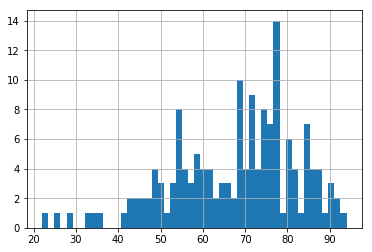

In [19]:
data.loc[data['release_year'].isna()]['critic_score'].hist(bins=50)

Выяснить дату релиза можно из некоторых названий игр. Однако доля игр, для которых не указана дата релиза составляет менее 0.2% от датасета. Эффективней будет удалить строки, чем заниматься спасением 0.2% данных из датасета. Кроме того, распределение оценок критиков на эти игры похоже на нормальное, таким образом скорее всего данные, которые мы удаляем, не несут критично важной информации.

In [20]:
data.drop(data.loc[data['release_year'].isna()].index, inplace=True)

In [21]:
data['release_year'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: release_year, dtype: int64

С колонками о продажах все в порядке. Добавим в таблицу колонку all_sales. 

In [22]:
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [23]:
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### rating, critic_score, user_score

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16444 non-null object
release_year    16444 non-null float64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
all_sales       16444 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Пропуски датасета остались лишь в колонках с оценками критиков и пользователей, а также в колонке с возрастными ограничениями фильма (rating).

Если мы будем заполнять пропуски, то мы сильно исказим датасет – в части общественной реакции на релиз он станет искусственным. Оставим NaN-ы на своих места и изучим данные подробнее, чтомы составить представление о возможных причинах пропусков.

In [25]:
data.loc[data['rating'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768 entries, 0 to 16706
Data columns (total 12 columns):
name            9768 non-null object
platform        9768 non-null object
release_year    9768 non-null float64
genre           9768 non-null object
na_sales        9768 non-null float64
eu_sales        9768 non-null float64
jp_sales        9768 non-null float64
other_sales     9768 non-null float64
critic_score    7902 non-null float64
user_score      9706 non-null object
rating          9768 non-null object
all_sales       9768 non-null float64
dtypes: float64(7), object(5)
memory usage: 992.1+ KB


In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
np.sort(data.loc[data['rating'].notna()]['release_year'].unique())

array([1985., 1988., 1992., 1994., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016.])

Обратим внимание, что почти для всех игр с проставленным рейтингом проставлены и оценки критиков. Временной охват таких игр – широкий, с 1985 года по 2016. Создадим два датасета – с данными об играх, для которых не проставлен рейтинг (то есть нет базовой информации характеристики об игре, на какую аудиторию она рассчитана), и с данными об играх, для которых проставлен рейтинг. Необходимо понять, для каких игр проставлены рейтинги, а для каких нет; определить возможные причны. Это позволит нам решить, как поступить с пропусками в более чем 40% датасета.

In [28]:
games_reviewed = data.loc[data['rating'].notna()][['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales','all_sales']]
games_blank = data.loc[data['rating'].isna()][['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales','all_sales']]

In [29]:
games_reviewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768 entries, 0 to 16706
Data columns (total 9 columns):
name            9768 non-null object
platform        9768 non-null object
release_year    9768 non-null float64
genre           9768 non-null object
na_sales        9768 non-null float64
eu_sales        9768 non-null float64
jp_sales        9768 non-null float64
other_sales     9768 non-null float64
all_sales       9768 non-null float64
dtypes: float64(6), object(3)
memory usage: 763.1+ KB


In [30]:
games_blank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 1 to 16714
Data columns (total 9 columns):
name            6676 non-null object
platform        6676 non-null object
release_year    6676 non-null float64
genre           6676 non-null object
na_sales        6676 non-null float64
eu_sales        6676 non-null float64
jp_sales        6676 non-null float64
other_sales     6676 non-null float64
all_sales       6676 non-null float64
dtypes: float64(6), object(3)
memory usage: 521.6+ KB


In [31]:
games_blank_var = np.var(games_blank['all_sales'], ddof=1)
games_reviewed_var = np.var(games_reviewed['all_sales'], ddof=1)

(games_reviewed_var-games_blank_var)/games_reviewed_var*100

33.70053685172972

Выборки data_sales и data_scores различаются более, чем на 5%.

Нулевая гипотеза: выборки games_blank и games_reviewed одинаковы.

In [32]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_blank['all_sales'], 
    games_reviewed['all_sales'],
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1372852226215716e-15
Отвергаем нулевую гипотезу


Выборки games_blank и games_reviewed отличаются. Продолжаем искать причину этих различий.

all_sales


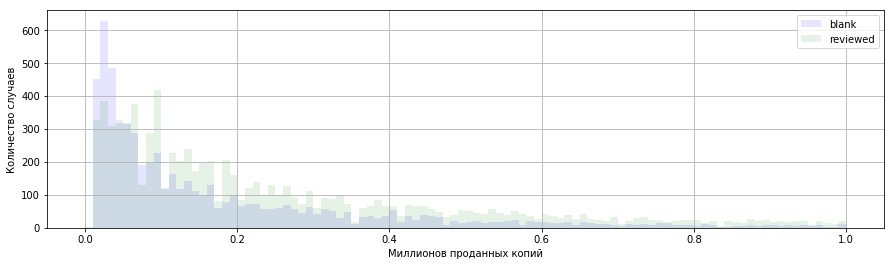

na_sales


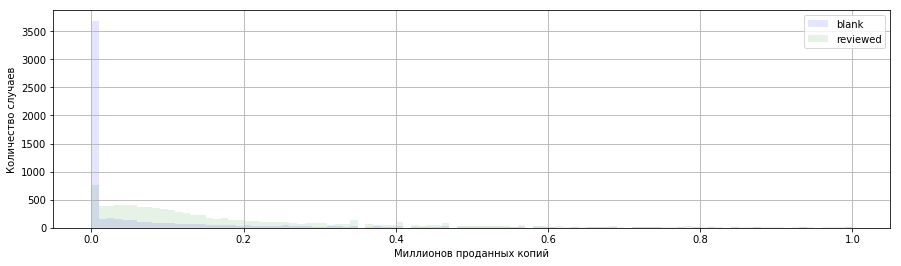

eu_sales


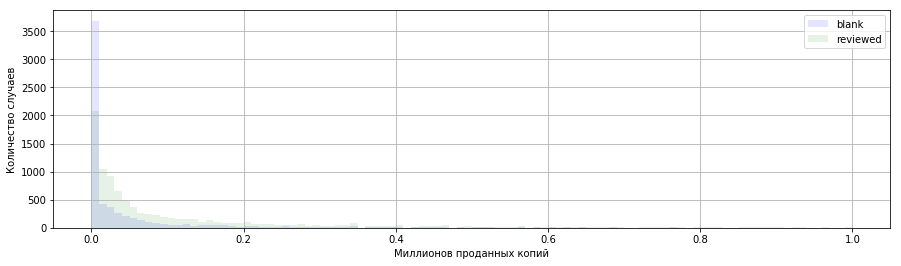

jp_sales


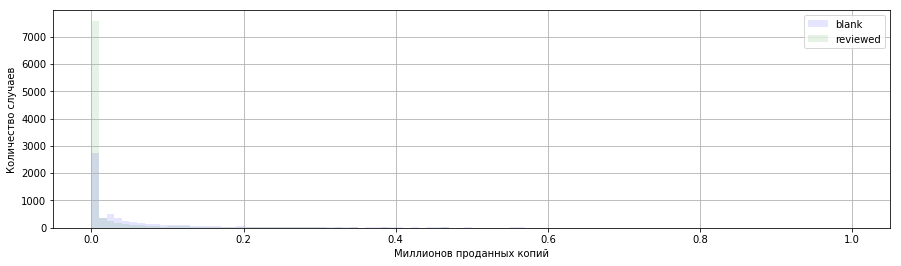

other_sales


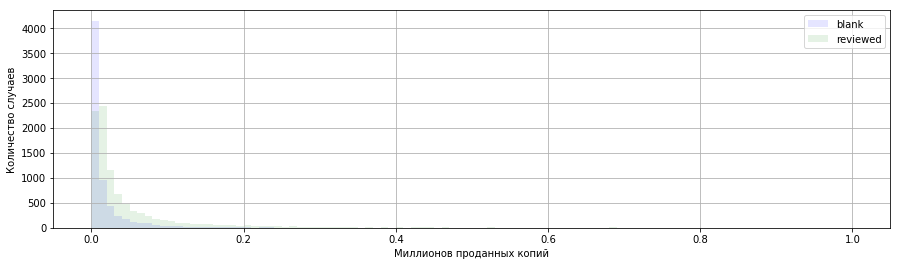

In [33]:
for i in ['all_sales','na_sales', 'eu_sales',
       'jp_sales', 'other_sales']:
    print(i)
    games_blank[i].hist(bins=100, figsize =(15,4), range=(0,1), grid=True, label='blank', color='blue', alpha=0.1)
    games_reviewed[i].hist(bins=100, figsize=(15,4), range=(0,1), grid=True, label='reviewed', color='green', alpha=0.1)
    plt.legend()
    plt.xlabel('Миллионов проданных копий')
    plt.ylabel('Количество случаев')
    plt.show()

Во всем мире, кроме Японии, игры из датасета reviewed популярнее игр из датасета blank.

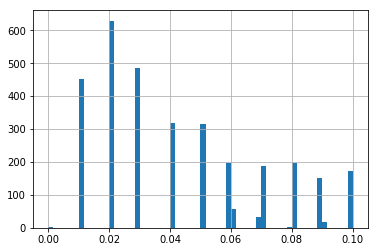

In [34]:
games_blank['all_sales'].hist(bins=60,range=(0,0.1))

Игры, для которых не были проставлены отзывы:
    - популярнее в Японии, чем игры для которых проставлены отзывы, но менее популярны в Северной Америке и Европе;
    - имеют пик продаж на отметке 20 тысяч проданных копий. Игры, для которых были проставлены отзывы, тоже имеют пик на этой отметке, но он в несколько раз меньше;
    - в мире в полтора раза менее успешные, чем игры для которых проставлены отзывы. А в Европе и Северной Америке – в два раза менее успешные.

Игры, для которых не проставлены отзывы, это скорее всего нишевые игры, популярные в Японии. Рассмотрим, жанры, платформы и год выпуска этих игр.

In [35]:
games_blank['platform'].value_counts()[:10]/games_blank.shape[0]*100

PS     14.769323
DS     12.971839
PS2    10.050929
PSP     9.841222
PS3     5.557220
N64     4.733373
Wii     4.628520
GBA     4.448772
3DS     4.328939
PSV     4.179149
Name: platform, dtype: float64

In [36]:
games_reviewed['platform'].value_counts()[:10]/games_reviewed.shape[0]*100

PS2     14.905815
DS      12.848075
X360    10.544636
Wii     10.002048
PS3      9.572072
PC       7.749795
XB       7.309582
PSP      5.487305
GBA      5.262080
GC       4.678542
Name: platform, dtype: float64

Игры из датасета games_blank выходят для более старых приставок. Самая представленная приставка – PS (15% случаев), в то время как игры из датасета games_reviewed выходят в первую очередь для PS2 (15%) и более старя версия приставки – PS – вообще не попала в топ-10 платформ датасета games_reviewed.

In [37]:
games_blank['genre'].value_counts()[:10]

Action          1161
Misc             859
Adventure        853
Sports           828
Role-Playing     711
Fighting         405
Racing           370
Strategy         341
Platform         317
Shooter          300
Name: genre, dtype: int64

In [38]:
games_reviewed['genre'].value_counts()[:10]

Action          2146
Sports          1478
Shooter          996
Misc             862
Racing           856
Role-Playing     770
Platform         561
Simulation       559
Adventure        440
Fighting         432
Name: genre, dtype: int64

Самый популярный жанр в обоих датасетах – action. Однако второй по популярности в датасетет games_blank – жанр Misc (среди игр с оценками занимает четвертое место). Жанр Misc или Miscellaneous games – это игры не вошедшие в предыдущие пять классов, проще говоря "Другое". Популярность этого жанра в датасете игр без оценок подкрепляет представление о том, что это скорее всего нишевые игры, с небольшой аудитории, популярные в Японии.

In [39]:
games_blank['release_year'].value_counts()/games_blank.shape[0]*100

2010.0    6.830437
2008.0    6.680647
2011.0    6.485920
2009.0    6.216297
2007.0    5.632115
1998.0    5.197723
2006.0    4.913122
2012.0    4.463751
1999.0    4.433793
2015.0    4.358898
1997.0    4.044338
1996.0    3.834632
2014.0    3.535051
2005.0    3.490114
2013.0    3.415219
2016.0    3.325345
1995.0    3.280407
2000.0    3.025764
2002.0    2.606351
2004.0    2.456561
2003.0    2.426603
2001.0    2.142001
1994.0    1.797484
1993.0    0.898742
1981.0    0.689035
1991.0    0.614140
1992.0    0.614140
1982.0    0.539245
1986.0    0.314560
1989.0    0.254643
1983.0    0.254643
1987.0    0.239664
1990.0    0.239664
1988.0    0.209706
1984.0    0.209706
1985.0    0.194727
1980.0    0.134811
Name: release_year, dtype: float64

In [40]:
games_reviewed['release_year'].value_counts()/games_blank.shape[0]*100

2009.0    15.143799
2008.0    14.694428
2007.0    12.297783
2010.0    11.968244
2005.0    10.575195
2011.0    10.530258
2006.0    10.155782
2002.0     9.811264
2003.0     9.182145
2004.0     8.957460
2012.0     5.317555
2014.0     5.167765
2001.0     5.077891
2013.0     4.733373
2015.0     4.718394
2016.0     4.194128
2000.0     2.216896
1999.0     0.629119
1998.0     0.479329
1997.0     0.284602
1996.0     0.104853
1992.0     0.029958
1994.0     0.014979
1988.0     0.014979
1985.0     0.014979
Name: release_year, dtype: float64

Около 90% игр из датасета games_blank были выпущены с 1994 по 2016 год, в то время как более 90% игр из датасета games_reviewed были выпущены начиная с 2000 года.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16444 non-null object
release_year    16444 non-null float64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
all_sales       16444 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


В колонке user_score встречается значение tbd, то есть to be determined. Так обозначают ситуации, в которых пользователи оставили слишком мало отзывов, чтобы можно было оставить репрезентативную оценку. Данных нет, а значит заменяем такие значения на NaN.

In [42]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [43]:
data['user_score'] = data['user_score'].astype('float64')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16444 non-null object
release_year    16444 non-null float64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      7463 non-null float64
rating          9768 non-null object
all_sales       16444 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


Осталось заменить формат данных на целочисленный в колонке с годом релиза и датасет готов к анализу.

In [45]:
data['release_year'] = data['release_year'].astype('int64')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16444 non-null object
release_year    16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      7463 non-null float64
rating          9768 non-null object
all_sales       16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# Часть 3. Анализ
<a id='4-bullet'></a>
## 3.1 Выбираем актуальную информацию и ищем лидеров

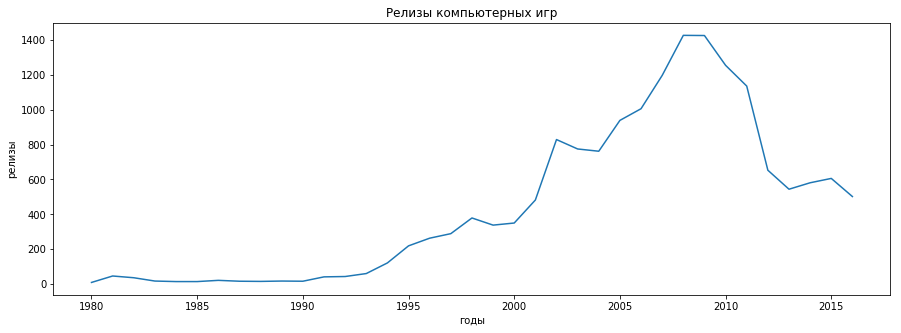

In [47]:
data.groupby('release_year')['name'].count().plot(figsize=(15,5))

plt.title('Релизы компьютерных игр')
plt.xlabel('годы')
plt.ylabel('релизы')
plt.show()

In [48]:
top_5_platforms = data['platform'].value_counts()[:5].index

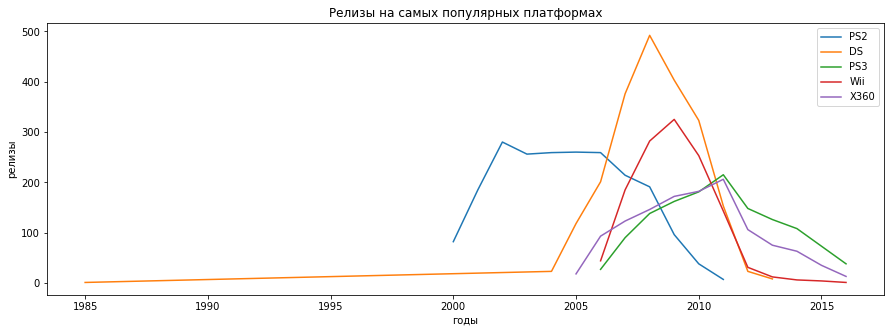

In [49]:
for i in top_5_platforms:
    data.query('platform == @i').groupby('release_year')['name'].count().plot(figsize=(15,5), legend=True, label=i)
plt.title('Релизы на самых популярных платформах')
plt.xlabel('годы')
plt.ylabel('релизы')
plt.show()

На графике видны 4 лидера: старейшая платформа DS от Nintendo, инновационная Wii, тоже от Nintendo, PS3 от PlayStation и  X360 от Xbox. X360 и PS3 идут нога в ногу начиная с середины 2000х. Обогнав конкурентов в начале 2010-х они начали терять и вместе с конкурентами к 2016 году достигли самых низких отметок, сопоставимых с теми, с которых они стартовали.

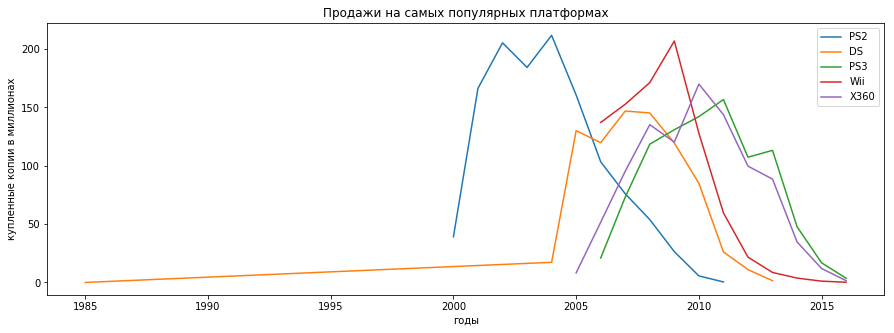

In [50]:
for i in top_5_platforms:
    data.query('platform == @i').groupby('release_year')['all_sales'].sum().plot(figsize=(15,5), legend=True, label=i)
plt.title('Продажи на самых популярных платформах')
plt.xlabel('годы')
plt.ylabel('купленные копии в миллионах')
plt.show()

Выше мы построили график продаж на платформах из top-5 по количеству релизов. Заметно, что закат в количестве релизов соответсвтует закату в продажах. Таким образом, наиболее благоприятные с точки зрения продаж – платформы существующие от 1,5 до 8 лет.

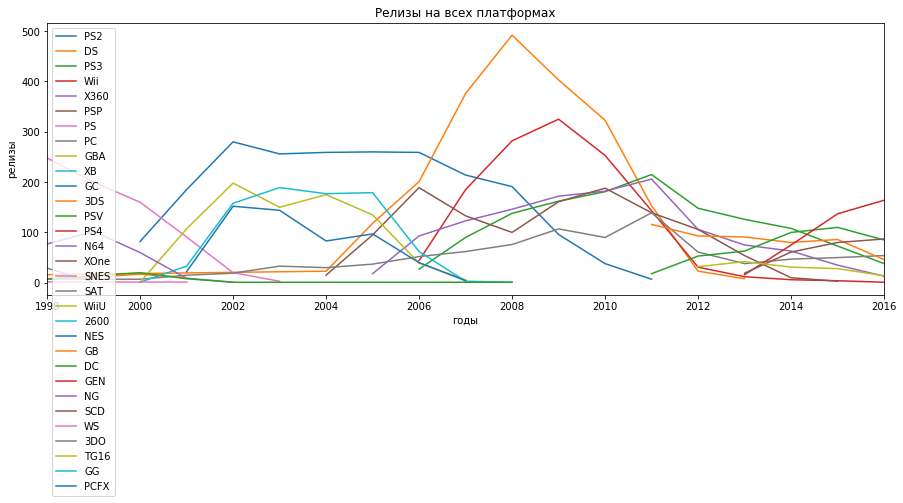

In [51]:
for i in data['platform'].value_counts().index:
    data.query('platform == @i').groupby('release_year')['name'].count().plot(figsize=(15,5), legend=True, label=i)
plt.xlim(left=1998, right=2016)
plt.title('Релизы на всех платформах')
plt.xlabel('годы')
plt.ylabel('релизы')
plt.show()

График для каждой из платформ имеет силует горы: стартуют, набируют релизы, достигают пика, теряют релизы, исчезают. Типичный период жизни платформы – игровой приставки – от 8 до 12 лет. Существует также самая долгоиграющая платформа – PC (то есть персональный компьютер).

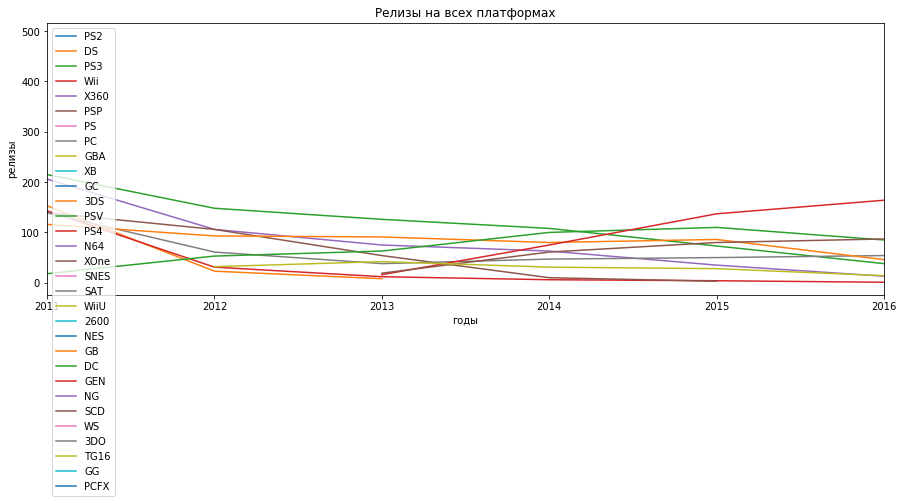

In [52]:
for i in data['platform'].value_counts().index:
    data.query('platform == @i').groupby('release_year')['name'].count().plot(figsize=(15,5), legend=True, label=i)
plt.xlim(left=2011, right=2016)
plt.title('Релизы на всех платформах')
plt.xlabel('годы')
plt.ylabel('релизы')
plt.show()

In [53]:
prev_years = range(2011,2017)
top_active = data.query('release_year in @prev_years').groupby('platform')['release_year'].count().index

In [54]:
top_active

Index(['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU',
       'X360', 'XOne'],
      dtype='object', name='platform')

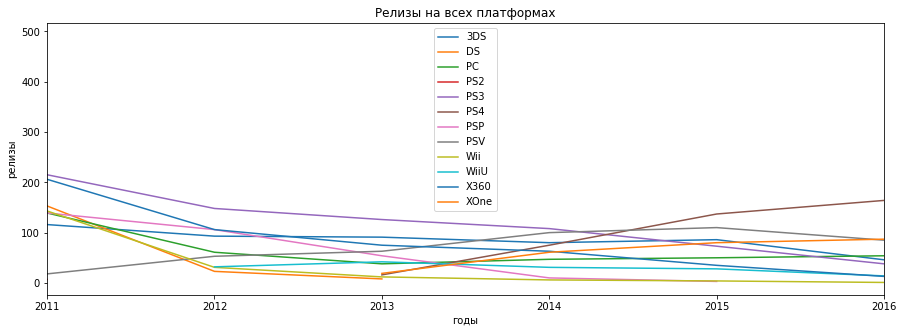

In [55]:
for i in top_active:
    data.query('platform == @i').groupby('release_year')['name'].count().plot(figsize=(15,5), legend=True, label=i)
plt.xlim(left=2011, right=2016)
plt.title('Релизы на всех платформах')
plt.xlabel('годы')
plt.ylabel('релизы')
plt.show()

In [56]:
top_growing = data.query('release_year > 2013 and platform in ["PS4","XOne","PC","WiiU"]').groupby('platform')['release_year'].count().index

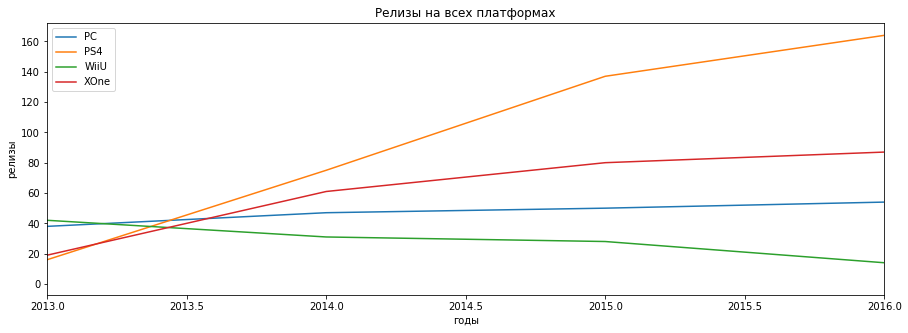

In [57]:
for i in top_growing:
    data.query('platform == @i').groupby('release_year')['name'].count().plot(figsize=(15,5), legend=True, label=i)
plt.xlim(left=2013, right=2016)
plt.title('Релизы на всех платформах')
plt.xlabel('годы')
plt.ylabel('релизы')
plt.show()

На графике заметны несколько растущих платформ: PS4, XOne, WiiU, они начали свой путь в 2012-2013 годах. Учитывая, жизненный цикл их предшественников, пик платформы как правило начинается через 3-6 лет после старта, столько же времени будет занимать угасание платформы. Что касается 2016 года, платформы (игровые приставки) PS4, DS, WiiU – на взлете, они самые перспективные и актуальные платформы из всех остальных. Если очерчивать группу платформ, представляющих интерес для анализа, необходимо добавить к этой тройке еще одну платформу (нестареющую классику) – PC (персональный компьютер).

### Промежуточный итог:
- актуальный период для нашего анализа – 2011-2016 гг. В этот этот период попадают хвосты жизненного цикла нескольких прежде популярных платформ (DS, Wii, PS3, X360), а также входят "хвосты" новых растущих платформ (PS4 и XOne). Данные о работе платформ в этот период помогут построить прогноз на 2017 год;
- данные до 2011 года не представляют интереса для исследования;
- среди платформ можно выделить всего 2 перспектиные компании, на 2016 год находили в фазе активного роста: PS4 и XOne;
- среди новых платформ есть также WiiU, но в отличие от PS4 и Xone c 2012 года она наблюдает падение релизов.

In [58]:
data = data.query('release_year >= 2011')

In [59]:
data.shape[0]

4022

Text(0,0.5,'Продажи в млн руб')

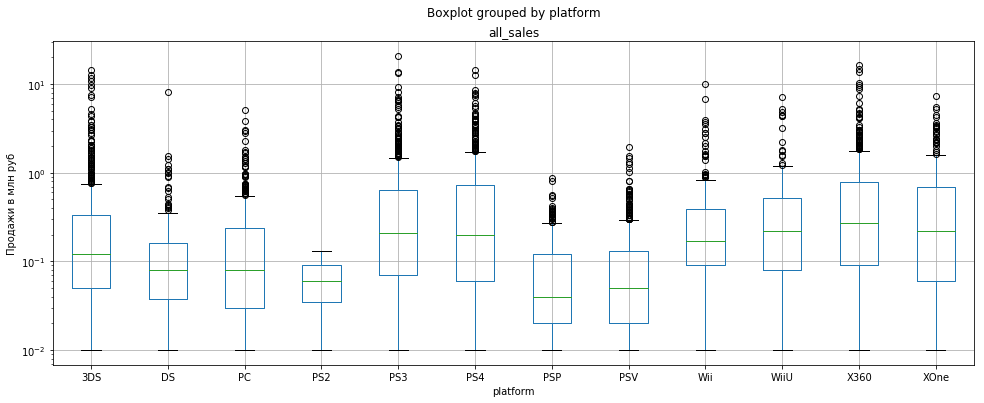

In [60]:
data.boxplot(by='platform', column='all_sales', figsize=(16,6))
plt.yscale('log')
plt.ylabel('Продажи в млн руб')

Боксплоты выглядят одинаково для растущих платформ PS4 и XOne: половина игр там продается от 100 тысяч до 1 млн копий. Их предшественники X360 и PS3 находятся в сопоставимом сегменте средних продаж. Низкие продажи в PS2, DS и Wii – прежних лидеров – объясняются тем, что в актуальный период вошли только их закатные данные.

Самы хитовые игры – у приставок 3DS, PS3, PS4, Wii и X360, аутлайеры этих платформ выходят за границы 10 миллионов продаж.

In [61]:
data.query('platform in ["Wii", "3DS", "PS3", "PS4", "X360"] and all_sales > 10')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Самая хитовая игра в выбранном нами актуальном периоде – Grand Theft Auto V. Больше продаж она собрала на PS3, чем на X360.

Рассмотрим детальнее плафторму PS3.

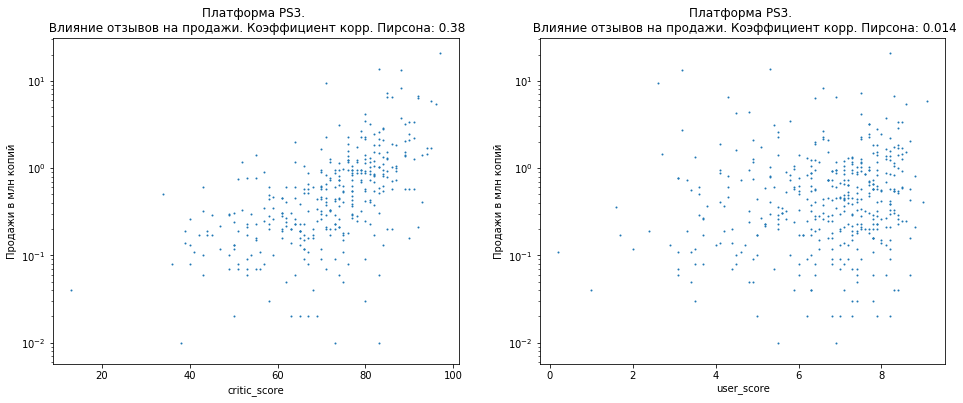

In [62]:
wii = data.query('platform == "PS3"')
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)

for icolumn, column in enumerate(['critic_score', 'user_score']):
    corr_p = wii[column].corr(wii['all_sales'])
    ax[icolumn].scatter(wii[column], wii['all_sales'], s=1)
    ax[icolumn].set_title('Платформа PS3. \n Влияние отзывов на продажи. Коэффициент корр. Пирсона: {:.2}'.format(corr_p))
    ax[icolumn].set_xlabel(column)
    ax[icolumn].set_ylabel('Продажи в млн копий')
    ax[icolumn].set_yscale('log')

Облака на скаттерплотах вытянуты диагонально. Есть некоторая связь между тем насколько высоко критики игры PS3 и тем, как часто их покупали (коэффициент Пирсона 0.38). Почти не имеет эффекта на продажи оценки обычных пользователей – коэффициент Пирсона почти равен нулю: 0.014. Рассмотрим, повторяется ли эта ситуации с играми на платформах в целом.

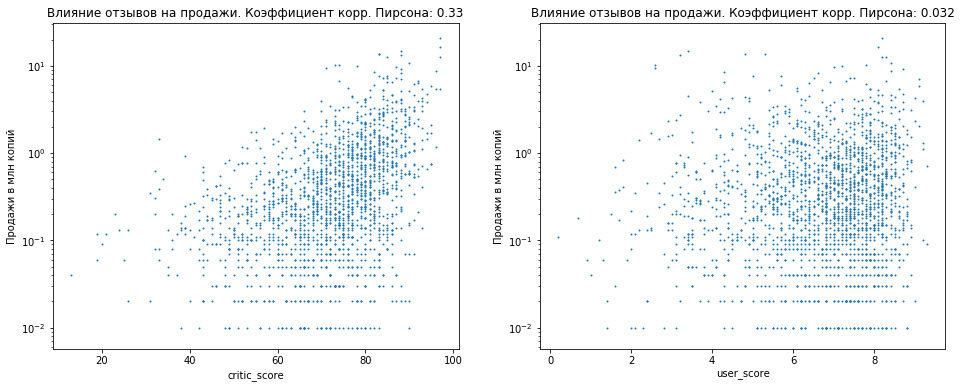

In [63]:
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)

for icolumn, column in enumerate(['critic_score', 'user_score']):
    corr_p = data[column].corr(data['all_sales'])
    ax[icolumn].scatter(data[column], data['all_sales'], s=1)
    ax[icolumn].set_title('Влияние отзывов на продажи. Коэффициент корр. Пирсона: {:.2}'.format(corr_p))
    ax[icolumn].set_xlabel(column)
    ax[icolumn].set_ylabel('Продажи в млн копий')
    ax[icolumn].set_yscale('log')

Облака на скаттерплотах вытянуты диагонально, ситуация повторяется – оценки критиков не сильно, но влияют на продажи, а оценки пользователей – нет. Коэффициент Пирсона это подтверждает: 0.33 (отзывы критиков) и 0.032 (отзывы пользователей). Рассмотрим, повторяется ли эта ситуации в случае с PC, нестареющей классикой.

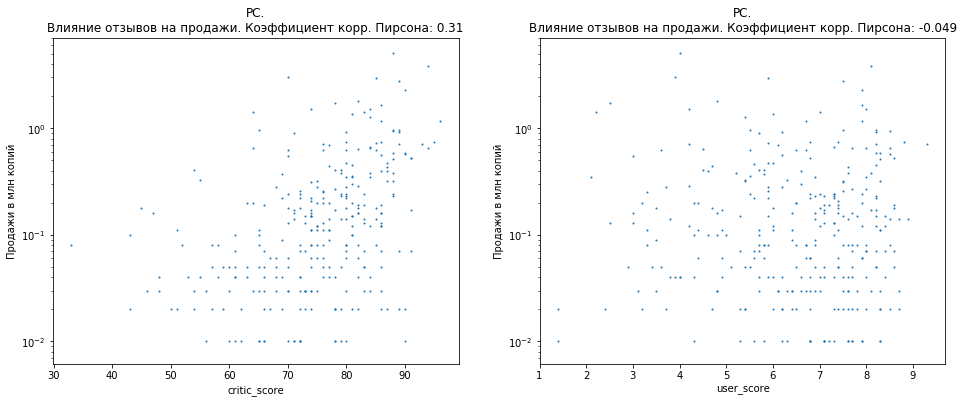

In [64]:
pc = data.query('platform == "PC"')
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)

for icolumn, column in enumerate(['critic_score', 'user_score']):
    corr_p = pc[column].corr(pc['all_sales'])
    ax[icolumn].scatter(pc[column], pc['all_sales'], s=1)
    ax[icolumn].set_title('PC.\nВлияние отзывов на продажи. Коэффициент корр. Пирсона: {:.2}'.format(corr_p))
    ax[icolumn].set_xlabel(column)
    ax[icolumn].set_ylabel('Продажи в млн копий')
    ax[icolumn].set_yscale('log')

Для PC ситуация повторяется.

### Промежуточный итог:
- отзывы критиков имет некоторое влияние на продажи игры;
- отзывы пользователей не имеют влияния на продажи игры.

Text(0,0.5,'Продажи в млн руб')

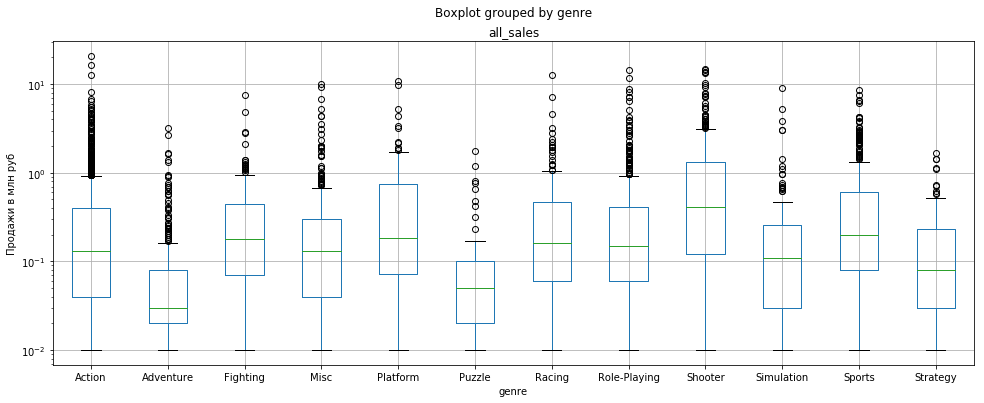

In [65]:
data.boxplot(by='genre', column='all_sales', figsize=(16,6))
plt.yscale('log')
plt.ylabel('Продажи в млн руб')

Самые прибыльные жанры – шутеры, спортивные игры и файтинги. Аутлаеры, игры которые продались более 10 миллионов раз, есть в этих и дргуих жанрах: экшн, "другое", платформеры, паззлы, гонки и симуляции. Отчетливо видны жанры с низкими продажами: приключения, паззлы и стратегии.

### Промежуточный итог:
- самые прибыльные жанры: шутеры, спортивные игры и файтинги;
- самые низкие продажи в жанрах: приключения, паззл и стратегии.

<a id='5-bullet'></a>
## 3.2 Портреты пользователей: Европа, Северная Америка, Япония

### Жанры

In [66]:
data.groupby('genre')['eu_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.449909
Platform        0.246475
Sports          0.227455
Racing          0.225444
Action          0.156911
Simulation      0.145000
Role-Playing    0.133978
Misc            0.105920
Fighting        0.102138
Strategy        0.068547
Puzzle          0.050141
Adventure       0.034049
Name: eu_sales, dtype: float64

Самый популярный жанр игр в Европе – шутеры (450 тысяч скачиваний). Следующие по популярности – платформеры, спортивные игры и гонки. В среднем игры такого жанра продаются от 200 до 250 тысяч раз.

In [67]:
data.groupby('genre')['na_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.590973
Platform        0.313770
Sports          0.279434
Fighting        0.198931
Misc            0.185840
Action          0.181970
Role-Playing    0.180172
Racing          0.177667
Simulation      0.113015
Strategy        0.063932
Puzzle          0.038592
Adventure       0.036000
Name: na_sales, dtype: float64

Самый популярные игры в Северной Америке – шутеры (в среднем 600 тысяч продаж на игру), около 300 тысяч продаж приходится на спортивные игры и платформеры.

In [68]:
data.groupby('genre')['jp_sales'].mean().sort_values(ascending=False)

genre
Role-Playing    0.171763
Platform        0.099426
Simulation      0.085588
Fighting        0.077862
Action          0.050134
Misc            0.046933
Puzzle          0.040986
Strategy        0.040855
Shooter         0.036231
Racing          0.031333
Adventure       0.029439
Sports          0.028509
Name: jp_sales, dtype: float64

В Японии лидируют по продажам полевые игры (170 тысяч продаж на игру). На втором месте – платформеры (почти 100 тысяч продаж на игру) и далее – симуляторы и файтинги (около 80 тысяч продаж). Шутеры – четвертые с конца по популярности, всего 36 тысяч продаж на игру, значительно меньше, чем в Европе или Северной Америке.

### Промежуточный итог:
- в Европе и Северной Америке самый популярный жанр – шутеры;
- в Европе больше, чем в остальных регионах любят гонки, в Северной Америке такая ситуация с файтингами, а в Японии – с ролевыми играми.

### Платформы

In [69]:
data.groupby('platform')['eu_sales'].mean().sort_values(ascending=False)

platform
PS4     0.359923
X360    0.235141
PS3     0.230367
XOne    0.208866
WiiU    0.170952
Wii     0.150254
PC      0.145758
3DS     0.119668
DS      0.050217
PSV     0.030466
PS2     0.018571
PSP     0.005673
Name: eu_sales, dtype: float64

Самая популярная платформа в Европе – PlayStation, первое место по продажам занимает восходящий PS4, а третье закатный PS3. Суммарно это около 600 тысяч скачиваний на игру. Следующими востребованы X360 и XOne.

In [70]:
data.groupby('platform')['na_sales'].mean().sort_values(ascending=False)

platform
X360    0.455422
XOne    0.377004
PS4     0.277398
WiiU    0.259184
Wii     0.246497
PS3     0.237655
3DS     0.161426
DS      0.102500
PC      0.076812
PSV     0.029068
PS2     0.018571
PSP     0.007019
Name: na_sales, dtype: float64

Самая популярная платформа в Северной Америке – Xbox (суммарно почти 8 миллионов скачиваний на игру). Лидирует уходящий X360 (450 тысяч скачиваний на игру), ему в спину дышит восходящий XOne (380 тысяч скачиваний).

In [71]:
data.groupby('platform')['jp_sales'].mean().sort_values(ascending=False)

platform
3DS     0.196523
WiiU    0.088503
PSP     0.077051
PS3     0.069760
PSV     0.050909
Wii     0.045533
DS      0.043696
PS4     0.040714
PS2     0.012857
X360    0.006727
XOne    0.001377
PC      0.000000
Name: jp_sales, dtype: float64

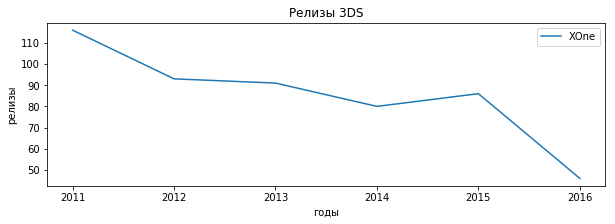

In [72]:
data.query('platform == "3DS"').groupby('release_year')['name'].count().plot(figsize=(10,3), legend=True, label=i)
plt.title('Релизы 3DS')
plt.xlabel('годы')
plt.ylabel('релизы')
plt.show()

Самая популярная платформа в Японии – 3DS – почти 200 тысяч скачиваний на игру. При этом, в анализируемый период Nintendo 3DS наблюдает свой финал. Компания Nintendo в 2020 году объявила о закрытии платформы. Следующая по популярности платформа – Nintendo WiiU (90 тысяч скачиваний), это одна из новых платформ, которой в актуальном периоде не удалось достигнуть, в отличие от конкурентов PS4 и XOne.

### Промежуточный итог:
- в Северной Америке охотнее играют в платформы XBox, в Европе – в PlayStation, в Японии – в Nintendo.

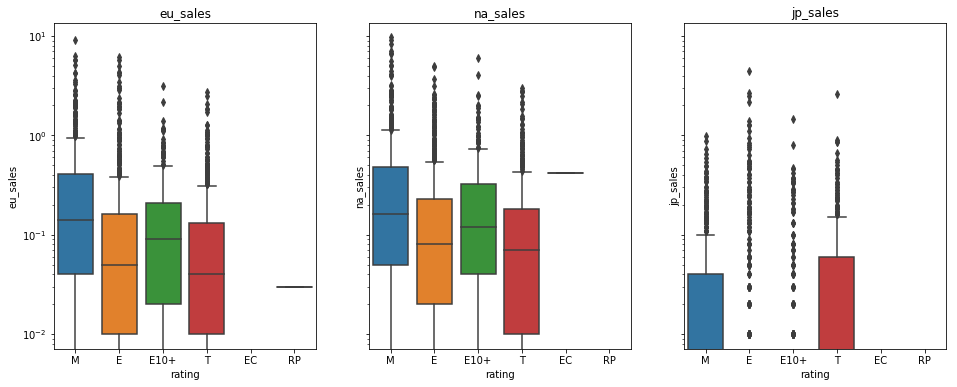

In [73]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 6), ncols=3, sharey=True)
for icolumn, column in enumerate(['eu_sales', 'na_sales', 'jp_sales']):
    sns.boxplot(data=data, x='rating', y=column, ax=ax[icolumn])
    ax[icolumn].set_yscale('log')
    ax[icolumn].set_title(column)
    

На графиках мы видим, что продажи по категориям распределяются не равноценно. Во всех регионах игры категории M (игры для людей старше 17) – самые востребованный по сравнению с играми другой маркировки. Самые длиные "хвосты" на боксплотах во всех регионах имеют игры категории E (для всех) – в этом сегменте есть громкие хиты с очень высокими продажами.

### Промежуточный итог:
- самые востребованные во всех регионах игры категории М (для людей старше 17, в эту категорию входят шутеры).

<a id='6-bullet'></a>
## 3.3 Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [74]:
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [75]:
data.columns

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

In [76]:
xbox_data = data.query('platform in ["X360", "XB", "XOne"]')
ps_data = data.query('platform in ["PSV", "PS2", "PS3", "PSP", "PS4"]')

users_xbox_var = np.var(xbox_data['user_score'], ddof=1)
users_ps_var = np.var(ps_data['user_score'], ddof=1)

users_xbox_var, users_ps_var

(2.2709461303222755, 2.3299871336463687)

In [77]:
xbox_data['user_score'].mean(), ps_data['user_score'].mean()

(6.394871794871793, 6.776766467065871)

In [78]:
(users_xbox_var-users_ps_var)/users_ps_var*100

-2.5339626331625063

Выборки отличаются друг от друга менее, чем на 5%.

In [79]:
alpha = .05

results = st.ttest_ind(
    xbox_data['user_score'], 
    ps_data['user_score'],
    equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [80]:
action_data = data.query('genre == "Action"')
sports_data = data.query('genre == "Sports"')

action_data_var = np.var(action_data['user_score'], ddof=1)
sports_data_var = np.var(sports_data['user_score'], ddof=1)

action_data_var, sports_data_var

(1.8118770103036566, 2.882509540401525)

In [81]:
action_data['user_score'].mean(), sports_data['user_score'].mean()

(6.775903614457846, 5.650813008130081)

In [82]:
(action_data_var-sports_data_var)/sports_data_var*100

-37.14237594331544

Выборки отличаются друг от друга более, чем на 5%.

In [83]:
alpha = .05

results = st.ttest_ind(
    action_data['user_score'], 
    sports_data['user_score'],
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Cредние пользовательские рейтинги жанров Action и Sports одинаковые.

<a id='7-bullet'></a>
# Выводы

- На этапе подготовки данных в датасете было обнаружено большое количество пропусков в колонках с пользовательскими оценками, было принято решение оставить пропуски и не заполнять их средними значениями.

- Анализ истории релизов компьютерных игр на различных платформах показал:
    - в среднем платформа существует от 8 до 12 лет, пик релизов приходится на середину этого временного промежутка;
    - упадок одной платформы подхватывает рост другой платформы из её же семейства: Xbox, PS или Nintendo;
    - актуальный период для анализа – 2011-2016 гг.: в эти годы укладывается конце жизненного цикл популярных прежде платформ, а также есть хвосты растущих платформ;
    - наибольшее внимание "Стримчику" стоит обращать на платформы, которые появились до 6 лет назад, дальнейшая жизнь платформы – угасание, стоит обращать внимание на альтернативу, которую готовит ей её "семейство";
    - актуальные для 2016 года восходящие платформы – это PS4, XOne. Еще одна молодая платформа WiiU – в отличие отконкурентов не показала роста.
    
- Анализ взаимосвязи отзывов общественности и количества проданных копий показал:
    - отзывы критиков влияют на продажи, а пользователей – нет.
    
    
- Самые прибыльные жанры игр: шутеры, спортивные игры и файтинги.


- Самые низкие продажи наблюдаются в жанрах: приключения, паззл и стратегии.
    
    
- В Европе самые популярные жанры: шутеры, платформеры, гонки и спортивные игры. Самые популярные платформы в Европе – из семейства PS.

- В Северной Америке самый популярный жанр – шутер, следом идут спортивные игры, платформеры и файтинги. Играют американцы в основном на платформах семейства Xbox.

- В Японии самый популярный жанр – ролевая игра. Кроме того, японцы – фанаты Nintendo, особенно престарелой платформы 3DS, которую закрыли в 2020 году.

- Рейтинг ESRB, то есть возрастная категория фильма, слабо влият на продажи. Можно выделить категорию M (Mature, для людей старше 17 лет, в эту категорию входят игры с изображениям насилия, в том числе шутеры) как сегмент, в котором продажи немного выше, чем в остальных категориях.

- Проверка гипотез показала, что пользователи одинаково относятся к платформам из семейств XBox и PS. Такая же ситуация c тем, как пользователи оценивают популярные жанры Action и Sports.


<font color='light-blue'>Интернет-магазину "Стримчик", который продает по всему миру компьютерные игры, при планировании рекламных бюджетов необходимо:</font> 
    - обращать внимание на жизненный цикл платформы, на которой происходит релиз игры (не стоит вкладываться в закатные платформы, вместе с падением количества релизов, у них происходит падение продаж);
    - обращать внимание на предпочтения аудитории, в регионе которой планируется рекламная кампания;
    - присматриваться к оценкам критиков и игнорировать оценки пользователей.